In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [ ]:
!mkdir "/content/datasets"
!unzip "/content/archive (3).zip" -d "/content/datasets"

mkdir: cannot create directory ‘/content/datasets’: File exists
Archive:  /content/archive (3).zip
  inflating: /content/datasets/Business Sales Transaction.csv  


In [ ]:
df=pd.read_csv("/content/datasets/Business Sales Transaction.csv")
df.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C567518,2019-09-20,21871,Save The Planet Mug,1.75,-12,NaN,United Kingdom
536346,C569495,2019-10-04,21843,Red Retrospot Cake Stand,3.14,-1,NaN,United Kingdom
536347,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,2.12,-1,NaN,United Kingdom
536348,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,3.71,-1,NaN,United Kingdom
536349,C575153,2019-11-08,22947,Wooden Advent Calendar Red,6.48,-1,NaN,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
 8   Year           536350 non-null  int64         
 9   Month          536350 non-null  int64         
 10  Day            536350 non-null  int64         
 11  Revenue        536350 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 49.1+ MB


In [ ]:
df["Country"].value_counts()

United Kingdom          485095
Germany                  10675
France                   10526
EIRE                      8048
Belgium                   2539
Spain                     2430
Switzerland               2336
Netherlands               2330
Portugal                  1848
Australia                 1704
Norway                     938
Austria                    887
Iceland                    787
Finland                    692
Italy                      661
Channel Islands            629
Cyprus                     582
Unspecified                447
Sweden                     417
Denmark                    416
USA                        379
Japan                      371
Israel                     358
Singapore                  215
Poland                     174
Hong Kong                  153
Canada                     150
Malta                      149
United Arab Emirates        67
Greece                      67
European Community          58
RSA                         57
Lebanon 

In [ ]:
df["Price"].max()

98.92

In [ ]:
len(df["ProductName"].value_counts())

3768

In [ ]:
top12= pd.value_counts(df["ProductName"]).iloc[:12]
top12

Cream Hanging Heart T-Light Holder    2378
Regency Cakestand 3 Tier              2200
Jumbo Bag Red Retrospot               2159
Party Bunting                         1727
Lunch Bag Red Retrospot               1639
Assorted Colour Bird Ornament         1501
Popcorn Holder                        1476
Set Of 3 Cake Tins Pantry Design      1473
Pack Of 72 Retrospot Cake Cases       1385
Lunch Bag Black Skull                 1350
Lunch Bag Suki Design                 1348
Natural Slate Heart Chalkboard        1280
Name: ProductName, dtype: int64

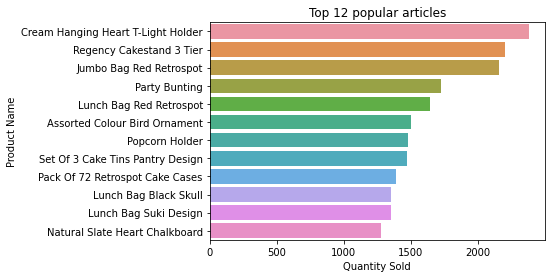

In [ ]:

fig,ax=plt.subplots()
sns.countplot(y="ProductName", data=df, order=top12.index);
ax.set_xlabel("Quantity Sold")
ax.set_ylabel("Product Name")
ax.set_title('Top 12 popular articles')
plt.show()

In [ ]:
df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']  = df['Date'].dt.day

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850.0,United Kingdom,2018,12,1
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850.0,United Kingdom,2018,12,1
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850.0,United Kingdom,2018,12,1
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850.0,United Kingdom,2018,12,1
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850.0,United Kingdom,2018,12,1


In [ ]:
months = [unique for unique in df.Month.unique()]
months.append(12)

In [ ]:
import numpy as np
df["Quantity"]=np.where((df.Quantity<0),0,df.Quantity)
df["Revenue"]=df["Price"]*df["Quantity"]


In [ ]:
month_revenue = df.groupby(by=['Year',"Month"])['Revenue'].sum()
month_revenue = pd.DataFrame(month_revenue).sort_values(ascending=True, by='Revenue')
month_revenue

Revenue
Year Month            
2019 2       501000.42
     4       539808.62
     12      561848.70
2018 12      654862.81
2019 3       670613.28
     1       681776.65
     6       694702.14
     5       704000.08
     7       704140.49
     8       741655.77
     9      1009368.51
     10     1097581.76
     11     1363406.07

In [ ]:
years=[unique for unique in df.Year.unique()]
def plot_trend(years:list,months:list, df):
    i=0
    for month in months:
        if month==12:
          new_df = df[(df['Month'] == month) & (df["Year"]==years[i])]
          i+=1
        else:  
          new_df = df[df['Month'] == month]
        new_df.groupby('Date')['Revenue'].sum().plot(linewidth=1.2, 
                                             ylabel='Revenue', 
                                             xlabel='Date', 
                                             title='Sales Trend');

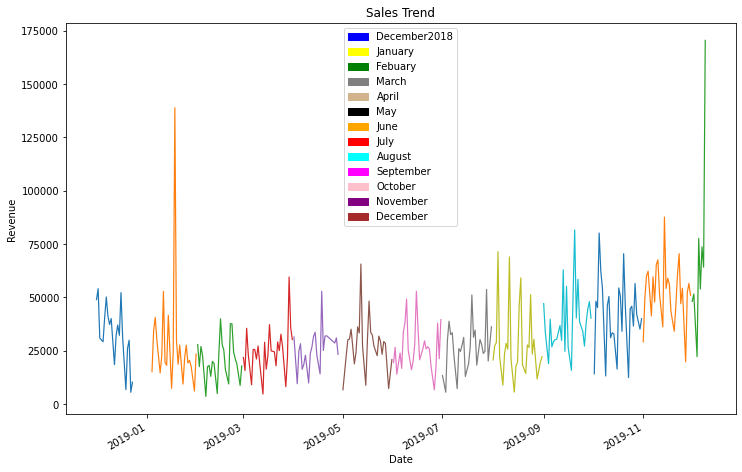

In [ ]:
import matplotlib.patches as patches
plt.figure(figsize=(12,8))
month0 = patches.Patch(color='blue', label='December2018')
month1 = patches.Patch(color='yellow', label='January')
month2 = patches.Patch(color='green', label='Febuary')
month3 = patches.Patch(color='grey', label='March')
month4 = patches.Patch(color='tan', label='April')
month5 = patches.Patch(color='black', label='May')
month6 = patches.Patch(color='orange', label='June')
month7 = patches.Patch(color='red', label='July')
month8 = patches.Patch(color='cyan', label='August')
month9 = patches.Patch(color='magenta', label='September')
month10 = patches.Patch(color='pink', label='October')
month11= patches.Patch(color='purple', label='November')
month12= patches.Patch(color='brown', label='December')
plot_trend(years,months, df)

plt.legend(handles=[month0,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12])

In [ ]:
month_revenue = pd.DataFrame(df.groupby(by=['Month'])['Revenue'].sum()


SyntaxError: ignored

In [ ]:
df.describe()

,Price,Quantity,CustomerNo,Year,Month,Day,Revenue
count,536350.000000,536350.000000,536295.000000,536350.000000,536350.000000,536350.000000,536350.000000
mean,1.990811,10.425092,15227.893178,2018.921518,7.558300,15.017725,18.504270
std,0.673649,155.532476,1716.582932,0.268929,3.509412,8.660941,270.264873
min,1.500000,0.000000,12004.000000,2018.000000,1.000000,1.000000,0.000000
25%,1.690000,1.000000,13807.000000,2019.000000,5.000000,7.000000,2.740000
50%,1.810000,3.000000,15152.000000,2019.000000,8.000000,15.000000,6.740000
75%,2.120000,10.000000,16729.000000,2019.000000,11.000000,22.000000,18.720000
max,98.920000,80995.000000,18287.000000,2019.000000,12.000000,31.000000,146600.950000


In [ ]:
df["Quantity"].min()

0

In [ ]:
df["Price"].sum()

1067771.4899999998

In [ ]:
transactions = [unique for unique in df.TransactionNo.unique()]
len(transactions)

23205

In [ ]:
unit_per_transaction=df["Quantity"].sum()/len(transactions)

In [ ]:
unit_per_transaction

240.96091359620772

In [ ]:
country_revenue = df.groupby(by=["Country"])['Revenue'].sum()
country_revenue = pd.DataFrame(country_revenue).sort_values(ascending=False, by='Revenue')
country_revenue

,Revenue
Country,
United Kingdom,8306318.30
Netherlands,343914.10
EIRE,260840.15
Germany,212914.85
France,209697.97
Australia,149887.72
Sweden,59234.82
Switzerland,54680.39
Japan,44689.40


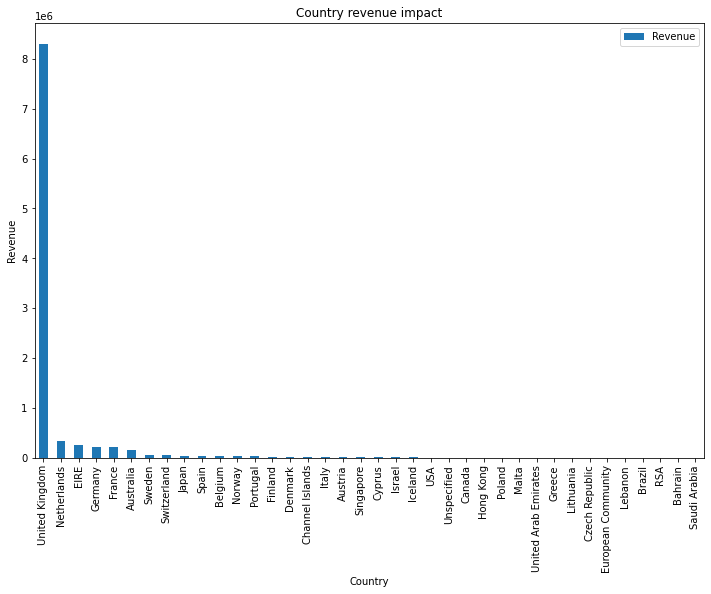

In [ ]:
country_revenue.plot(kind='bar', ylabel='Revenue', title='Country revenue impact',figsize=(12,8));

In [ ]:
print("The most profitable customers are the customers located in these Regions: ")
country_revenue.head(10)

The most profitable customers are the customers located in these Regions: 


,Revenue
Country,
United Kingdom,8306318.30
Netherlands,343914.10
EIRE,260840.15
Germany,212914.85
France,209697.97
Australia,149887.72
Sweden,59234.82
Switzerland,54680.39
Japan,44689.40


In [ ]:
country_revenue.iloc[::-1]

,Revenue
Country,
United Kingdom,8306318.30
Netherlands,343914.10
EIRE,260840.15
Germany,212914.85
France,209697.97
Australia,149887.72
Sweden,59234.82
Switzerland,54680.39
Japan,44689.40
